In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
jokes = pd.read_csv('../Data/jester_items.tsv',names=['JokeID','Text'], sep='\t', header=None)
jokes['JokeID'] = jokes['JokeID'].str.replace(':', '').astype(int)
jokes = jokes.set_index('JokeID')
jokes.head()

,Text
JokeID,
1,"A man visits the doctor. The doctor says, ""I h..."
2,This couple had an excellent relationship goin...
3,Q. What's 200 feet long and has 4 teeth? A. Th...
4,Q. What's the difference between a man and a t...
5,Q. What's O. J. Simpson's web address? A. Slas...


In [31]:
jokes.describe().T

,count,unique,top,freq
Text,150,150,"A man visits the doctor. The doctor says, ""I h...",1


*Adding Text Metrics*

In [32]:
jokes['CharCount'] = jokes['Text'].apply(len)
jokes['WordCount'] = jokes['Text'].apply(lambda x: len(x.split()))
jokes.head()

,Text,CharCount,WordCount
JokeID,,,
1,"A man visits the doctor. The doctor says, ""I h...",165,30
2,This couple had an excellent relationship goin...,375,71
3,Q. What's 200 feet long and has 4 teeth? A. Th...,85,18
4,Q. What's the difference between a man and a t...,108,21
5,Q. What's O. J. Simpson's web address? A. Slas...,88,14


In [33]:
ratings = pd.read_csv('../Data/jesterfinal151cols.csv', delimiter=',', header=None)
ratings_matrix = ratings.iloc[:,1:]

joke_avg_ratings = ratings_matrix.apply(lambda col: col[col != 99].mean(), axis=0)
joke_stds = ratings_matrix.apply(lambda x: x[x != 99].std(), axis=0)
joke_counts = (ratings_matrix != 99).sum(axis=0)

joke_stats = pd.DataFrame({
    'AverageRating': joke_avg_ratings,
    'StdDev': joke_stds,
    'Popularity': joke_counts
})

joke_stats

,AverageRating,StdDev,Popularity
1,NaN,NaN,0
2,NaN,NaN,0
3,NaN,NaN,0
4,NaN,NaN,0
5,-2.034618,5.423289,566
...,...,...,...
146,0.176494,5.439941,4913
147,1.782721,5.017120,9728
148,3.061374,4.788644,14988
149,2.399215,4.789101,10969


In [34]:
jokes = jokes.join(joke_stats)
jokes

,Text,CharCount,WordCount,AverageRating,StdDev,Popularity
JokeID,,,,,,
1,"A man visits the doctor. The doctor says, ""I h...",165,30,NaN,NaN,0
2,This couple had an excellent relationship goin...,375,71,NaN,NaN,0
3,Q. What's 200 feet long and has 4 teeth? A. Th...,85,18,NaN,NaN,0
4,Q. What's the difference between a man and a t...,108,21,NaN,NaN,0
5,Q. What's O. J. Simpson's web address? A. Slas...,88,14,-2.034618,5.423289,566
...,...,...,...,...,...,...
146,America: 8:00 - Welcome to work! 12:00 - Lunch...,311,63,0.176494,5.439941,4913
147,It was the day of the big sale. Rumors of the ...,592,122,1.782721,5.017120,9728
148,"Recently a teacher, a garbage collector, and a...",795,142,3.061374,4.788644,14988


In [35]:
jokes.describe().T

,count,mean,std,min,25%,50%,75%,max
CharCount,150.0,371.353333,283.465778,52.000000,131.750000,312.000000,524.750000,1326.000000
WordCount,150.0,67.953333,52.497151,8.000000,25.000000,55.500000,95.500000,255.000000
AverageRating,140.0,1.633048,1.448670,-2.748204,0.766848,1.915446,2.798824,3.714249
StdDev,140.0,5.080059,0.396503,4.283544,4.803620,5.071236,5.337730,6.082813
Popularity,150.0,11525.833333,11092.683135,0.000000,5339.750000,9225.000000,14565.250000,50692.000000


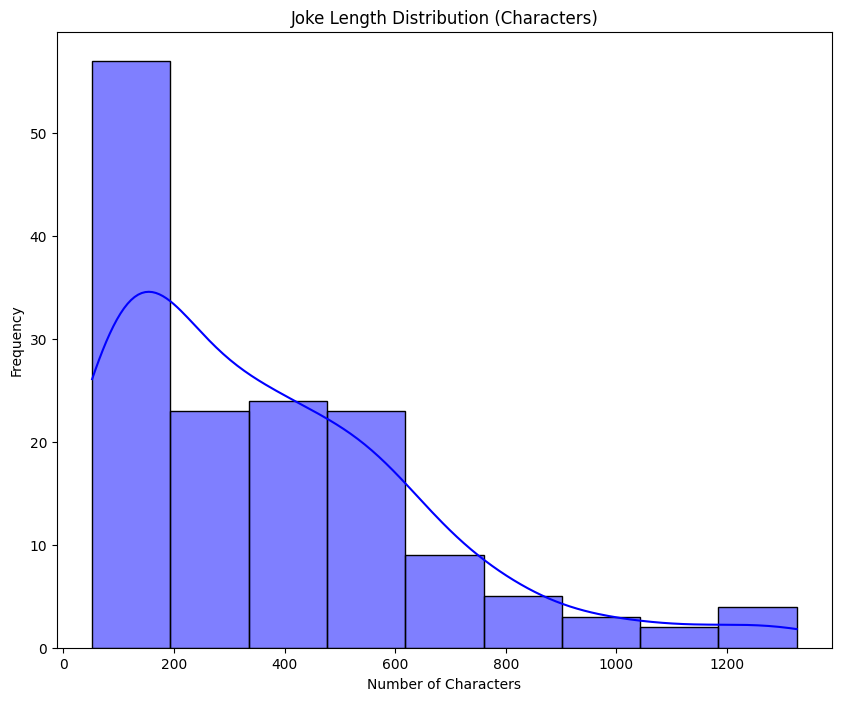

In [44]:
plt.figure(figsize=(10, 8))
sns.histplot(jokes['CharCount'], color='blue', kde=True)
plt.title('Joke Length Distribution (Characters)')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.savefig('../images/jokes_len_distribution.png')
plt.show()

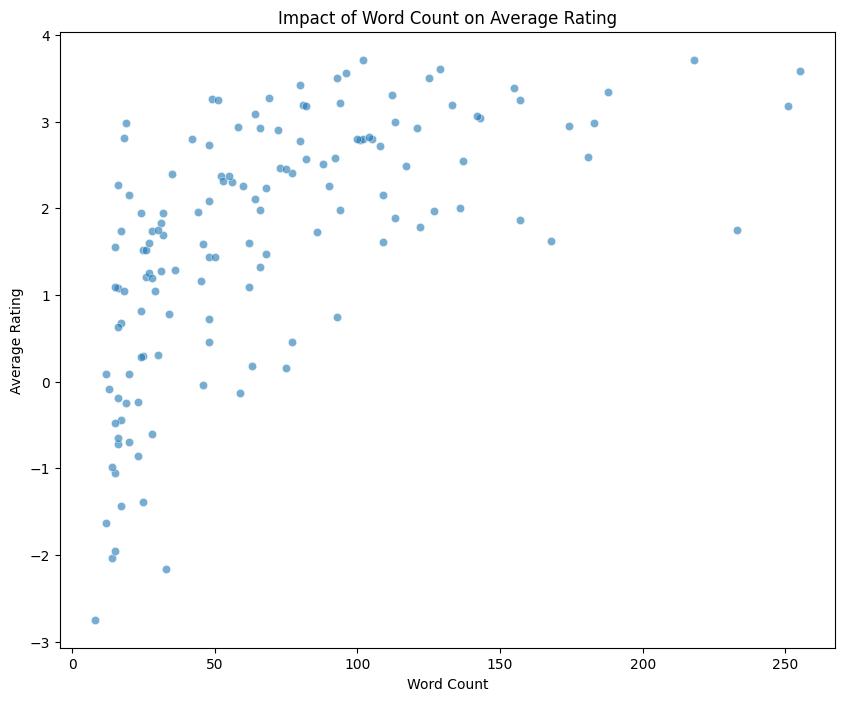

In [43]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=jokes, x='WordCount', y='AverageRating', alpha=0.6)
plt.title('Impact of Word Count on Average Rating')
plt.xlabel('Word Count')
plt.ylabel('Average Rating')
plt.show()

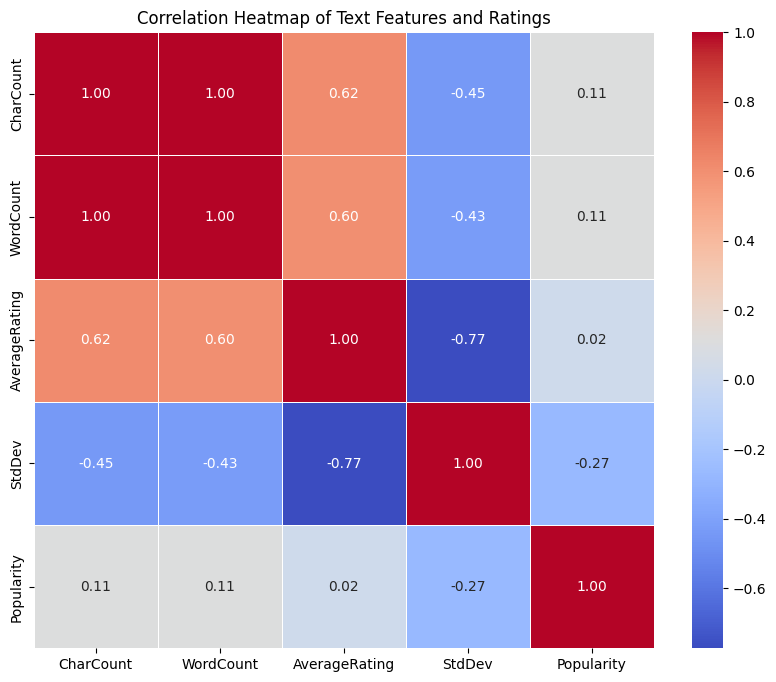

In [48]:
numeric_features = jokes.columns[1:]
plt.figure(figsize=(10,8))
sns.heatmap(jokes[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Text Features and Ratings')
plt.savefig('../images/corr_heatmap.png')
plt.show()

<Figure size 1000x800 with 0 Axes>

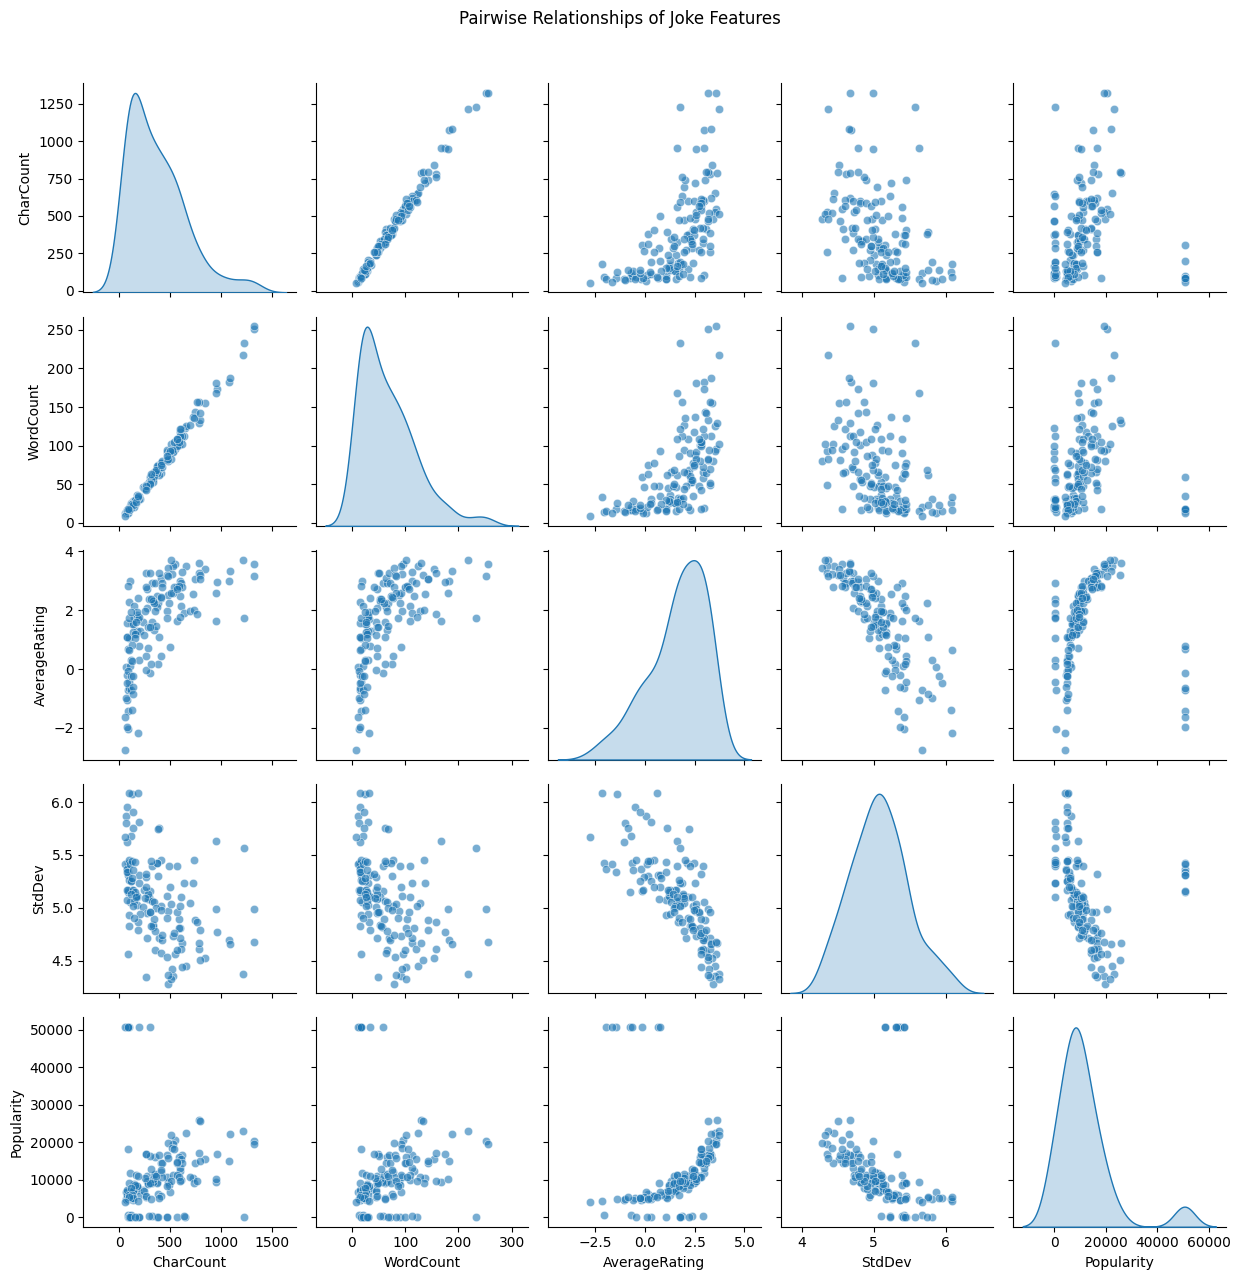

In [50]:
plt.figure(figsize=(10,8))
sns.pairplot(jokes[numeric_features], diag_kind='kde', kind='scatter', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships of Joke Features', y=1.02)
plt.tight_layout()
plt.savefig('../images/pairplot.png')
plt.show()